In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

# Import dataset

In [20]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

X_train = X_train / 255.0
test = test / 255.0

In [21]:


# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)



In [23]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [24]:
# Set the random seed
random_seed = 2

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

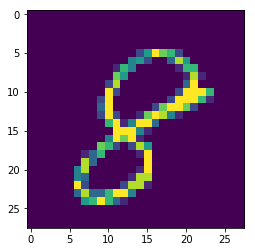

In [26]:
# Some examples
g = plt.imshow(X_train[0][:,:,0])

In [108]:
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.5))

model.add(Dense(512, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [61]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [109]:


# Compile the model
model.compile(optimizer = 'Adadelta' , loss = "categorical_crossentropy", metrics=["accuracy"])



In [100]:


# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [110]:
epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [111]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val), verbose = 2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 3s - loss: 0.3196 - acc: 0.8969 - val_loss: 0.0858 - val_acc: 0.9700
Epoch 2/10
 - 2s - loss: 0.1133 - acc: 0.9646 - val_loss: 0.0687 - val_acc: 0.9779
Epoch 3/10
 - 2s - loss: 0.0879 - acc: 0.9729 - val_loss: 0.0544 - val_acc: 0.9821
Epoch 4/10
 - 2s - loss: 0.0740 - acc: 0.9775 - val_loss: 0.0502 - val_acc: 0.9821
Epoch 5/10
 - 2s - loss: 0.0626 - acc: 0.9804 - val_loss: 0.0444 - val_acc: 0.9860
Epoch 6/10
 - 2s - loss: 0.0563 - acc: 0.9824 - val_loss: 0.0436 - val_acc: 0.9871
Epoch 7/10
 - 2s - loss: 0.0518 - acc: 0.9838 - val_loss: 0.0411 - val_acc: 0.9867
Epoch 8/10
 - 2s - loss: 0.0479 - acc: 0.9852 - val_loss: 0.0397 - val_acc: 0.9876
Epoch 9/10
 - 2s - loss: 0.0431 - acc: 0.9866 - val_loss: 0.0465 - val_acc: 0.9862
Epoch 10/10
 - 2s - loss: 0.0404 - acc: 0.9873 - val_loss: 0.0390 - val_acc: 0.9871


# Using tensorflow

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


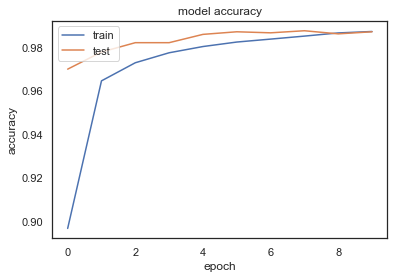

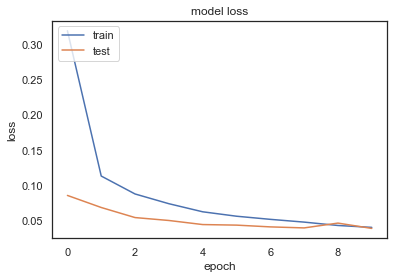

In [112]:

# Fit the model
#history = estimator.fit(df.drop('label', axis=1), keras.utils.to_categorical(df.label),
#                        validation_split=0.3, epochs=6, batch_size=55, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

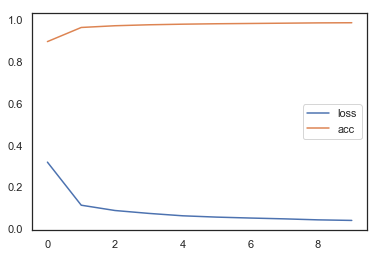

In [113]:
loss, = plt.plot(range(len( history.history['loss'])), history.history['loss'], label="loss")
acc, = plt.plot(range(len( history.history['loss'])), history.history['acc'], label="acc")
plt.legend()
plt.show()